In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
import re
import numpy as np
import seaborn as sns


In [3]:
data = pd.read_csv("../../data/storage/intermediate/bicimad_dataframe.csv")

In [6]:
# deleting unnamed columns
unnamed_columns = [column for column in data.columns if "Unnamed" in column]
data = data.drop(unnamed_columns, axis = 1)

In [7]:
data.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,no_available,address,dock_bikes,...,81,82,83,86,87,88,89,dia_semana,work_day_indicator,covid_indicator
0,1.0,Puerta del Sol A,0.0,2.0,30.0,16.0,1a,0.0,Puerta del Sol nº 1,13.0,...,0.22,67.0,10.8,59.0,958.0,1.0,0.0,domingo,1,0
1,1.0,Puerta del Sol B,0.0,2.0,30.0,11.0,1b,0.0,Puerta del Sol nº 1,14.0,...,0.22,67.0,10.8,59.0,958.0,1.0,0.0,domingo,1,0
2,1.0,Miguel Moya,0.0,1.0,24.0,2.0,2,0.0,Calle Miguel Moya nº 1,19.0,...,0.22,67.0,10.8,59.0,958.0,1.0,0.0,domingo,1,0
3,1.0,Plaza Conde Suchil,0.0,0.0,18.0,13.0,3,0.0,Plaza del Conde del Valle de Súchil nº 3,5.0,...,1.30,12.0,11.4,48.0,962.0,1.0,0.0,domingo,1,0
4,1.0,Malasaña,0.0,2.0,24.0,13.0,4,0.0,Calle Manuela Malasaña nº 5,11.0,...,1.30,12.0,11.4,48.0,962.0,1.0,0.0,domingo,1,0


In [8]:
data.columns

Index(['activate', 'name', 'reservations_count', 'light', 'total_bases',
       'free_bases', 'number', 'no_available', 'address', 'dock_bikes',
       'id_station', 'time', 'day', 'month', 'year', 'hour', 'weekday',
       'plugs_count', 'unplugs_count', 'latitude', 'longitude', '81', '82',
       '83', '86', '87', '88', '89', 'dia_semana', 'work_day_indicator',
       'covid_indicator'],
      dtype='object')

# Visualizing plugs and unplugs

### Daily

In [107]:
daily_plugs = data.groupby(['day', 'month', 'year']).agg({'plugs_count': 'sum', 'unplugs_count': 'sum'}).reset_index()
daily_plugs["time"] = daily_plugs.apply(lambda row: dt.datetime(int(row["year"]),int(row["month"]),int(row["day"])), axis = 1)

In [108]:
daily_plugs

,day,month,year,plugs_count,unplugs_count,time
0,1,1,2019,4249.0,4227.0,2019-01-01
1,1,1,2020,6726.0,6692.0,2020-01-01
2,1,1,2021,3138.0,3121.0,2021-01-01
3,1,1,2022,3953.0,3949.0,2022-01-01
4,1,2,2019,9547.0,9543.0,2019-02-01
...,...,...,...,...,...,...
1456,31,10,2022,9736.0,9733.0,2022-10-31
1457,31,12,2019,5068.0,5025.0,2019-12-31
1458,31,12,2020,4675.0,4636.0,2020-12-31
1459,31,12,2021,5088.0,5082.0,2021-12-31


In [109]:
daily_plugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   day            1461 non-null   int64         
 1   month          1461 non-null   int64         
 2   year           1461 non-null   int64         
 3   plugs_count    1461 non-null   float64       
 4   unplugs_count  1461 non-null   float64       
 5   time           1461 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 68.6 KB


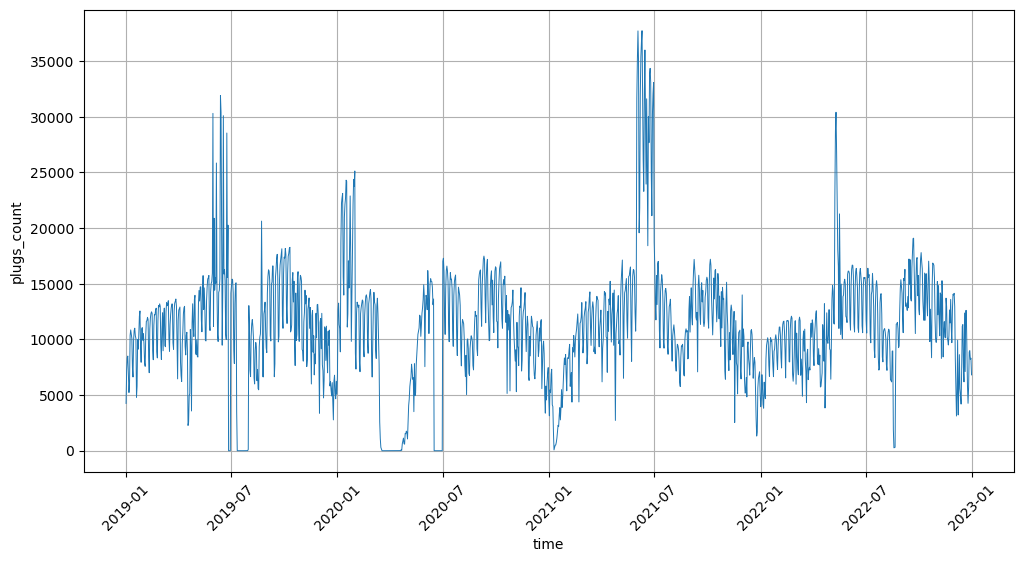

In [110]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_plugs,x="time", y="plugs_count",linewidth=0.7)
plt.xticks(rotation=45)
plt.grid()

In [140]:
daily_plugs = data[data["time"]<dt.datetime(2021,6,1)].groupby(['day', 'month', 'year']).agg({'plugs_count': 'sum', 'unplugs_count': 'sum'}).reset_index()
daily_plugs["week_number"]=daily_plugs.apply(lambda row: dt.date(int(row["year"]), int(row["month"]), int(row["day"])).isocalendar().week, axis = 1)

daily_plugs_wn = daily_plugs.groupby(["year", "week_number"]).agg({'plugs_count': 'mean', 'unplugs_count': 'mean'}).reset_index()
daily_plugs_wn['time'] = pd.to_datetime(daily_plugs_wn['year'].astype(str) + '-W' + daily_plugs_wn['week_number'].astype(str) + '-1', format='%Y-W%W-%w')

In [143]:
daily_plugs_wn["time"].describe()

/var/folders/yw/h9ndkfbx6_lb6gwchxbgts2m0000gn/T/ipykernel_59045/2765884869.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  daily_plugs_wn["time"].describe()


count                     128
unique                    127
top       2021-01-04 00:00:00
freq                        2
first     2019-01-07 00:00:00
last      2022-01-03 00:00:00
Name: time, dtype: object

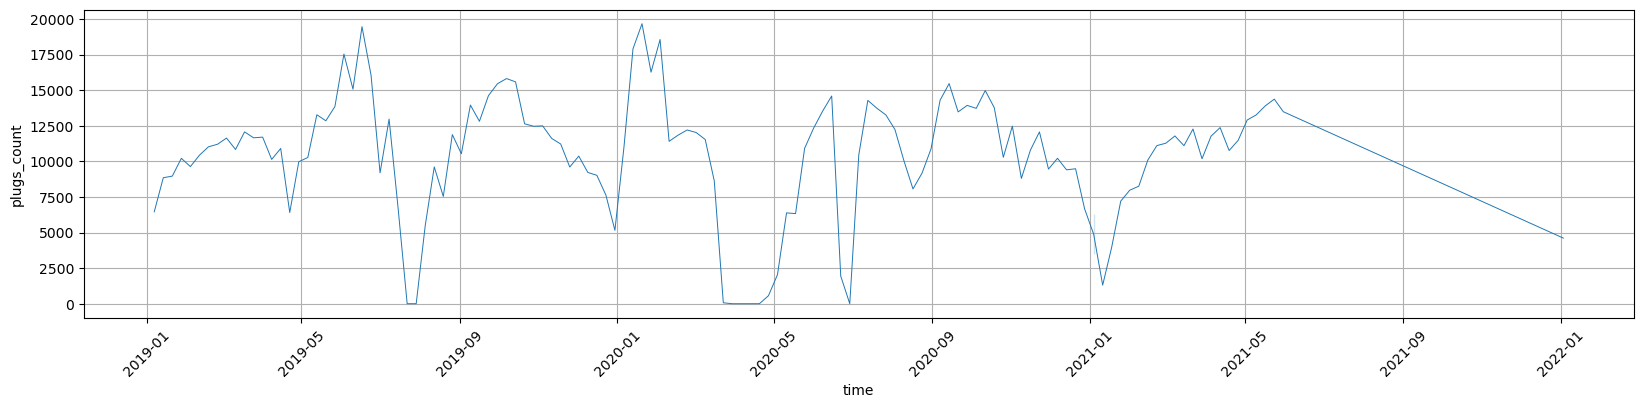

In [148]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=daily_plugs_wn,x="time", y="plugs_count",linewidth=0.7)
plt.xticks(rotation=45)
plt.grid()

In [111]:
data["time"] = pd.to_datetime(data["time"])

#### Daily innova

In [118]:
daily_plugs = data[data["time"]<dt.datetime(2021,6,1)].groupby(['day', 'month', 'year']).agg({'plugs_count': 'sum', 'unplugs_count': 'sum'}).reset_index()
daily_plugs["time"] = daily_plugs.apply(lambda row: dt.datetime(int(row["year"]),int(row["month"]),int(row["day"])), axis = 1)

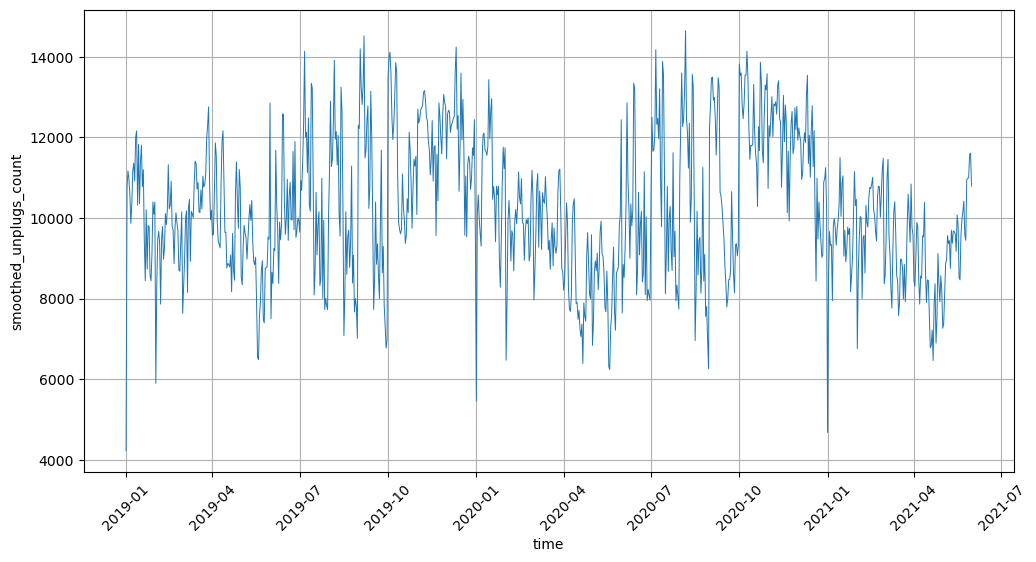

In [120]:
# Smooth the 'unplugs_count' column using a moving average
window_size = 7  # Adjust the window size as desired
daily_plugs['smoothed_unplugs_count'] = daily_plugs['unplugs_count'].rolling(window_size, min_periods=1).mean()


plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_plugs,x="time", y="smoothed_unplugs_count",linewidth=0.7)
plt.xticks(rotation=45)
plt.grid()

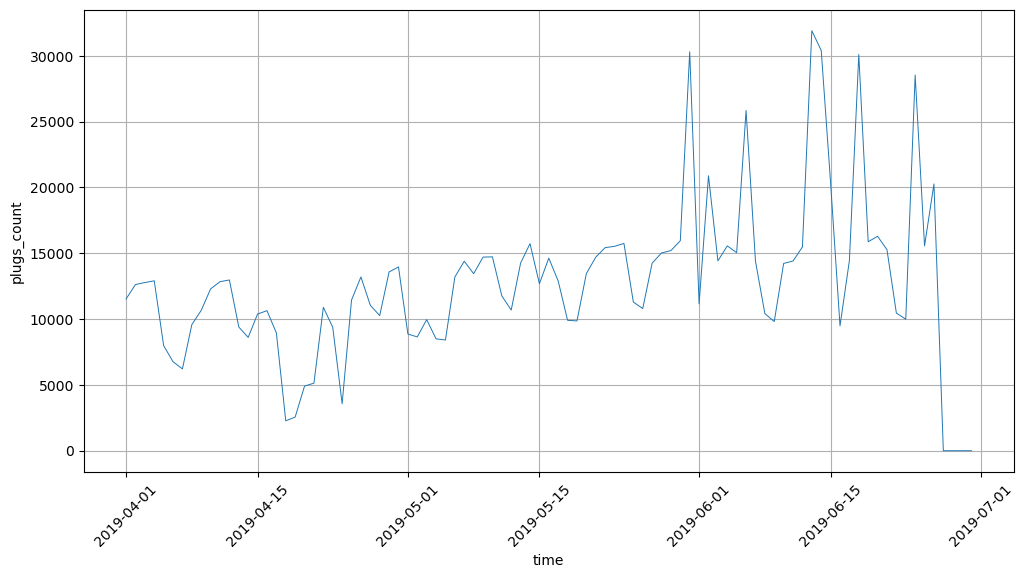

In [117]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_plugs,x="time", y="plugs_count",linewidth=0.7)
plt.xticks(rotation=45)
plt.grid()

### Monthly

In [114]:
#daily_plugs = data["number",'day', 'month', 'year', 'hour', 'plugs_count', 'unplugs_count'].groupby(['day', 'month', 'year'])
monthly_plugs = data.groupby(['month', 'year']).agg({'plugs_count': 'sum', 'unplugs_count': 'sum'}).reset_index()
monthly_plugs["time"] = monthly_plugs.apply(lambda row: dt.datetime(int(row["year"]),int(row["month"]),int(1)), axis = 1)
monthly_plugs.head()


,month,year,plugs_count,unplugs_count,time
0,1,2019,279066.0,276186.0,2019-01-01
1,1,2020,545750.0,540906.0,2020-01-01
2,1,2021,125642.0,125078.0,2021-01-01
3,1,2022,242453.0,242079.0,2022-01-01
4,2,2019,304430.0,301869.0,2019-02-01


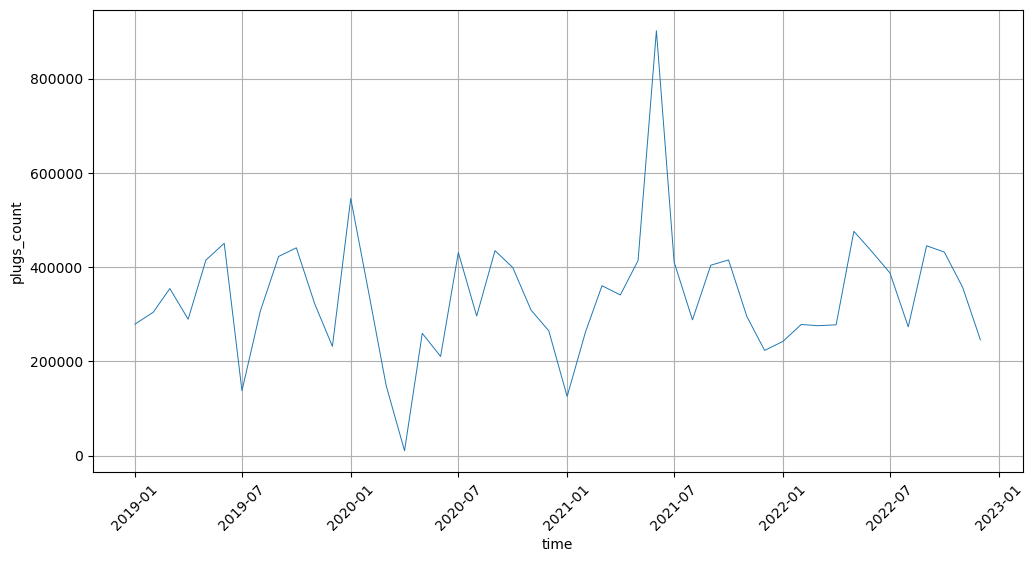

In [115]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_plugs,x="time", y="plugs_count",linewidth=0.7)
plt.xticks(rotation=45)
plt.grid()